# Lab 1

### Context
#### Exploratory Data Analysis
- Feature Distribution Visulization
- Feature Statistics & Outlier
- Missing Values

#### Data Preprocessing
- Data Scaling
    - Min-Max Scaling
    - Standard Scaling
    - Log Transformation
    - Box-Cox, Yeo-Johnson, Quantile Transformation


- Missing Value Imputation 
    - Mean, Median, Mode
    - Iterative Imputation(MICE)


- Categorical Variable to Numeric Variable
    - Label Encoding
    - One-hot Encoding

In [3]:
from os.path import join

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
BASE_DIR = ''

In [5]:
train_path = join(BASE_DIR, 'data', 'MDC14', 'train.csv')
test_path  = join(BASE_DIR, 'data', 'MDC14', 'test.csv')

data = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [6]:
data.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [9]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [7]:
data.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [14]:
# ?data.drop

In [10]:
# 불필요한 컬럼 제거
data.drop(columns=['index', 'credit'], inplace=True)
test.drop(columns=['index'],           inplace=True)

In [27]:
# data.dtypes.index

In [28]:
# [c for c in data.dtypes.index]

In [29]:
# [c for c in data.dtypes.index if len(c) < 5]

In [30]:
# for c, t in zip(data.dtypes.index, data.dtypes):
#     print(c, t)

In [11]:
# 파이썬 리스트 컴프리헨션
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes.values) if t == 'O'] 
num_columns = [c for c    in data.dtypes.index if c not in cat_columns]

print('Categorical Columns: \n{}\n'.format(cat_columns))
print('Numeric Columns: \n{}'.format(num_columns))

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

Numeric Columns: 
['child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month']


In [12]:
data.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


# Data Scaling
## 스케일링을 왜 해야할까요?
변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.<br>
Scikit-Learn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다.

- 주의!! 스케일링은 변수의 분포를 변경하지 않습니다. 

### 1. Min-Max Scaling
- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 
수식을 직관적으로 이해해보면, X에 존재하는 어떤 가장 작은 값 x <sub>m</sub>에 대해서 x <sub>m</sub>는 Min(X)의 값과 같습니다. <br>
따라서 스케일링 후 x<sub>m</sub>은 0이되고, X에 존재하는 어떤 가장 큰 값x <sub>M</sub>은 분모의 식과 같아지므로 1이됩니다.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$ 

Scikit-Learn에서 Min-Max Scaler는 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-learn Min-Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler)

In [32]:
data['DAYS_BIRTH']

0       -13899
1       -11380
2       -19087
3       -15088
4       -15037
         ...  
26452   -12079
26453   -15291
26454   -10082
26455   -10145
26456   -19569
Name: DAYS_BIRTH, Length: 26457, dtype: int64

In [33]:
numeric_data = data[num_columns]

#### 1) 모델 불러오기 및 정의하기

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#### 2) 데이터에서 특징 찾기(Min, Max 값)

In [35]:
scaler.fit(numeric_data)

MinMaxScaler()

#### 3) 데이터 변환

In [36]:
scaled_data = scaler.transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=num_columns)

#### 4) 결과 살펴보기

In [37]:
data[num_columns].head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0
1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0
2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0
3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0
4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0


In [38]:
data[num_columns].describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [39]:
scaled_data.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,0.000000,0.113372,0.644982,0.028885,0.0,0.0,0.0,0.0,0.052632,0.900000
1,0.052632,0.142442,0.789362,0.037204,0.0,0.0,0.0,1.0,0.105263,0.916667
2,0.000000,0.273256,0.347624,0.029607,0.0,0.0,1.0,0.0,0.052632,0.633333
3,0.000000,0.113372,0.576833,0.035755,0.0,0.0,1.0,0.0,0.052632,0.383333
4,0.000000,0.084302,0.579756,0.035721,0.0,0.0,0.0,0.0,0.052632,0.566667


In [40]:
scaled_data.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.022561,0.103557,0.526964,0.196300,0.0,0.224742,0.294251,0.091280,0.062992,0.564612
std,0.039333,0.065813,0.240820,0.360870,0.0,0.417420,0.455714,0.288013,0.048248,0.275992
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.061047,0.327907,0.032970,0.0,0.000000,0.000000,0.000000,0.052632,0.350000
50%,0.000000,0.084302,0.550524,0.037206,0.0,0.000000,0.000000,0.000000,0.052632,0.600000
75%,0.052632,0.127907,0.728263,0.040178,0.0,0.000000,1.000000,0.000000,0.105263,0.800000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


## 2. Standard Scaling
데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다. `z-score 정규화` 라고도 합니다.<br>
데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, mean(X) $$
$$ \sigma : 데이터의\ 표준편차, std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$
Scikit-Learn에서 Standard Scaler는 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-learn, Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

#### 1) 모델 불러오기 및 정의하기

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#### 2) 데이터에서 특징 찾기(Mean, Std 값)

In [42]:
scaler.fit(numeric_data)

StandardScaler()

#### 3) 데이터 변환

In [43]:
scaled_data = scaler.transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=num_columns)

#### 4) 결과 살펴보기

In [49]:
# data[num_columns].head()

In [45]:
data[num_columns].describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294
std,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550
min,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000
25%,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000
50%,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000
75%,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000
max,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000


In [48]:
# scaled_data.head()

In [47]:
scaled_data.describe()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
count,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,26457.0,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04
mean,3.289923e-17,4.726746e-17,1.020547e-16,5.505585e-18,0.0,3.719627e-17,-5.156450e-17,5.237020e-18,-3.007929e-17,6.069572e-17
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,0.0,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-5.735993e-01,-1.573539e+00,-2.188248e+00,-5.439748e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-1.305605e+00,-2.045789e+00
25%,-5.735993e-01,-6.459445e-01,-8.265948e-01,-4.526113e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-2.147353e-01,-7.776147e-01
50%,-5.735993e-01,-2.925752e-01,9.783481e-02,-4.408708e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-2.147353e-01,1.282242e-01
75%,7.645293e-01,3.699921e-01,8.359029e-01,-4.326364e-01,0.0,-5.384173e-01,1.548696e+00,-3.169372e-01,8.761348e-01,8.528952e-01
max,2.485084e+01,1.362134e+01,1.964307e+00,2.227162e+00,0.0,1.857295e+00,1.548696e+00,3.155199e+00,1.942093e+01,1.577566e+00


In [53]:
# 컴퓨터의 부동 소수점 연산

1000.0

<AxesSubplot:>

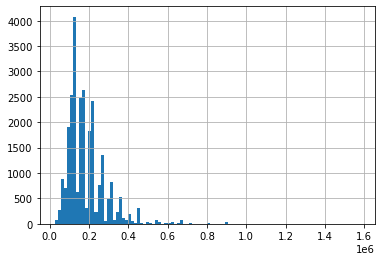

In [57]:
data['income_total'].hist(bins=100)

<AxesSubplot:>

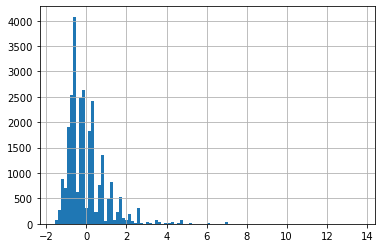

In [58]:
scaled_data['income_total'].hist(bins=100)

## 3. Log Transformation
변수의 범위를 조정하는 Min-Max Scaling과 Standard Scaling을 확인했습니다.<br>
이번에는 치우친 분포(skew)의 형태를 보정해주는 방법 중 하나인 Log Transformation에 대해 배우겠습니다.<br>
로그 변환은 어떤 변수의 범위가 양수인 경우 사용할 수 있으며, 각 변수에 대해 자연 로그를 취하는 연산 입니다.<br>
해당 연산을 적용하면, 다음과 같은 왼쪽으로 치우친 분포(왼쪽)를 좋은 형태(오른쪽)의 정규 분포의 형태로 만들어줄 수 있습니다.<br>
이는 왼쪽 그림에서 오른쪽으로 치우친 큰 값들을 작게(지수로) 표현함으로써 분포를 왼쪽으로 당기는 효과를 줄 수 있기 때문입니다.

<img src='https://miro.medium.com/max/1620/1*O2R4nH0nR6d3bOxaYU10lg.png'>

#### ref
- [Log Transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9)

<AxesSubplot:>

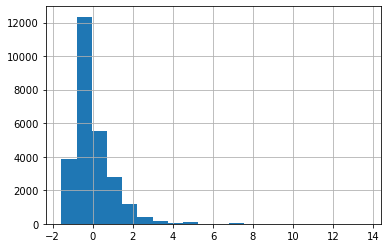

In [59]:
# 로그 변환 전
scaled_data['income_total'].hist(bins=20)

<AxesSubplot:>

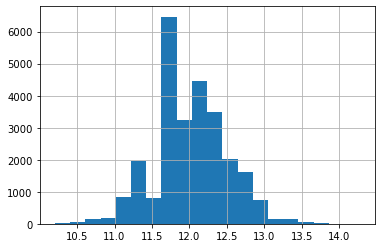

In [60]:
# 로그 변환 후
scaled_data['log_income_total'] = np.log(data['income_total'])
scaled_data['log_income_total'].hist(bins=20)

## 4. Box-Cox, Yeo-Johnson, Quantile Transformation
또 다른 여러가지 변환이 있습니다. 세가지 변환 모두 치우친 분포의 데이터를 정규 분포로 보정해주는 효과가 있으며,<br>
Box-Cox 변환의 경우 Log 변환과 함께 양수에만 적용할 수 있는 변환이고, Yeo-Johnsong 변환은 Box-Cox 변환의 제약인 음수를 가진 변수에서도 변환을 할 수 있는 변환입니다.<br>
Quantile 변환은 가장 자주 발생하는 값(the most frequent values.) 주위로 분포를 조정하며, 이상치의 영향을 감소시켜주는 특징도 있습니다.

- Box-Cox 변환은 Lambda 값에 따라 변환이 달라지게 되는데, Lambda 값이 0일 경우 Log 변환과 동일합니다.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png'>

#### ref
- [Scikit-learn PowerTransformer, Box-Cox, Yeo-Johnson Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)
- [Scikit-learn Quantile Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)
- [Scikit-learn Map Data To Normal Dist](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py)

<AxesSubplot:>

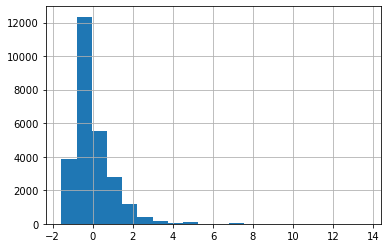

In [64]:
# 변환 전
scaled_data['income_total'].hist(bins=20)

<AxesSubplot:>

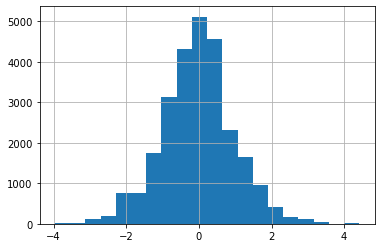

In [66]:
from sklearn.preprocessing import PowerTransformer

# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')

scaled_data['box_cox_income_total'] = trans.fit_transform(data['income_total'].values.reshape(-1, 1))
scaled_data['box_cox_income_total'].hist(bins=20)

<AxesSubplot:>

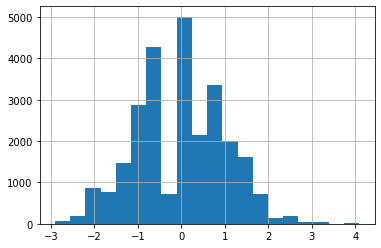

In [67]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')

scaled_data['yeo_johnson_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['yeo_johnson_income_total'].hist(bins=20)

<AxesSubplot:>

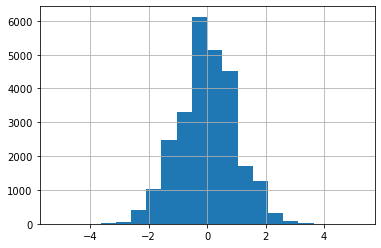

In [68]:
from sklearn.preprocessing import QuantileTransformer

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')

scaled_data['quantile_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['quantile_income_total'].hist(bins=20)

# Imputation
## 대표 값을 사용한 결측치 처리
정형 데이터를 다루다보면, 값이 NaN(Not a Number or Null)으로 되어있는 경우가 있습니다. 이러한 값을 결측치라 하며, <br>
가장 간단한 방법으로 평균이나 중간값 또는 최빈값 같은 변수의 대표값을 사용할 수 있습니다. <br>

결측치를 확인하는 방법으로 missingno 라이브러리의 `matrix()` 메소드를 사용하거나 Pandas의 `isna() + sum()` 메소드를 사용할 수 있습니다.

In [70]:
data.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0


<AxesSubplot:>

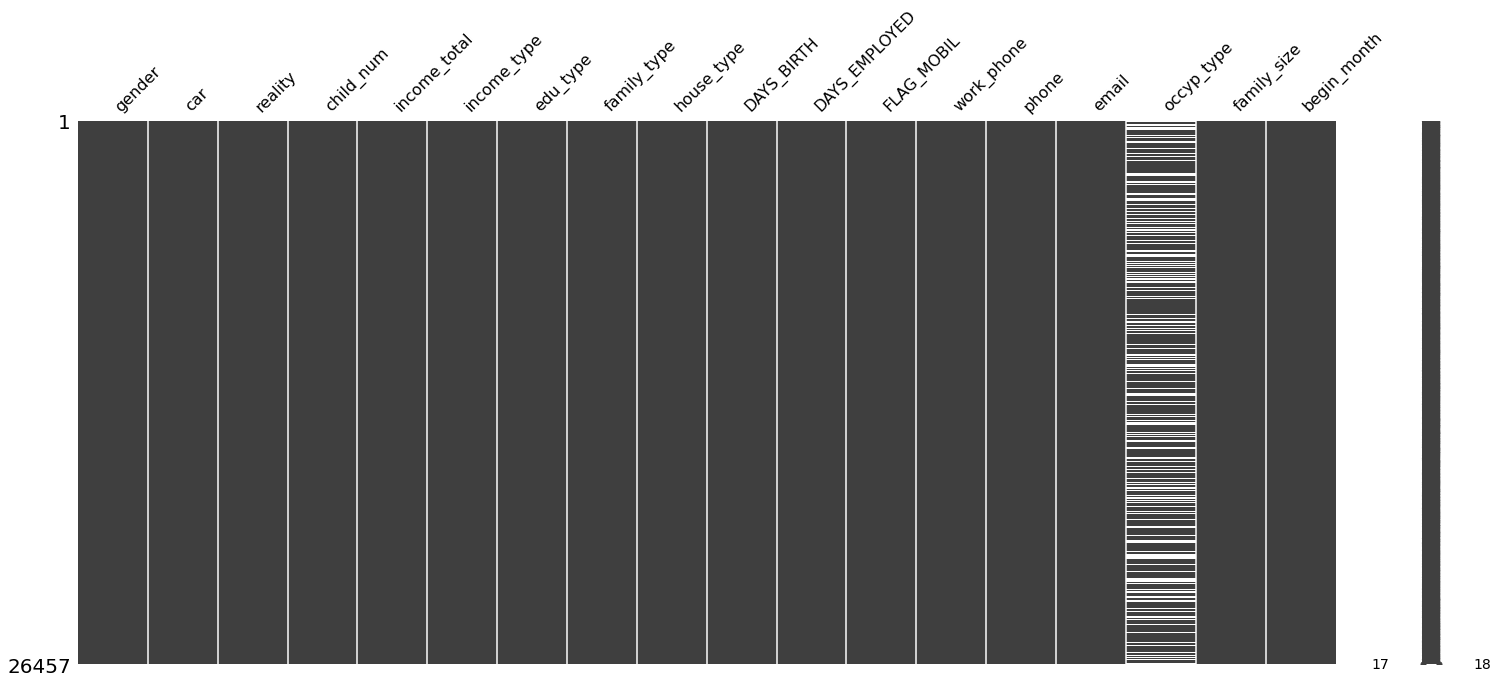

In [71]:
import missingno as msno

msno.matrix(data)

In [74]:
pd.isna(data)

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26453,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
26454,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
26455,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [73]:
pd.isna(data).sum()

gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
dtype: int64

수치형 변수에 결측치가 존재하지 않으므로 임의로 인덱스를 선택해 결측치를 만들겠습니다.

In [75]:
missing_idx = np.random.choice(data.index.values, size=data.shape[0]//10, replace=False)

In [76]:
data.shape, missing_idx.shape

((26457, 18), (2645,))

In [77]:
missed_data = data.copy()
missed_data.iloc[missing_idx] = np.nan 

In [78]:
pd.isna(missed_data).sum()

gender            2645
car               2645
reality           2645
child_num         2645
income_total      2645
income_type       2645
edu_type          2645
family_type       2645
house_type        2645
DAYS_BIRTH        2645
DAYS_EMPLOYED     2645
FLAG_MOBIL        2645
work_phone        2645
phone             2645
email             2645
occyp_type       10005
family_size       2645
begin_month       2645
dtype: int64

<AxesSubplot:>

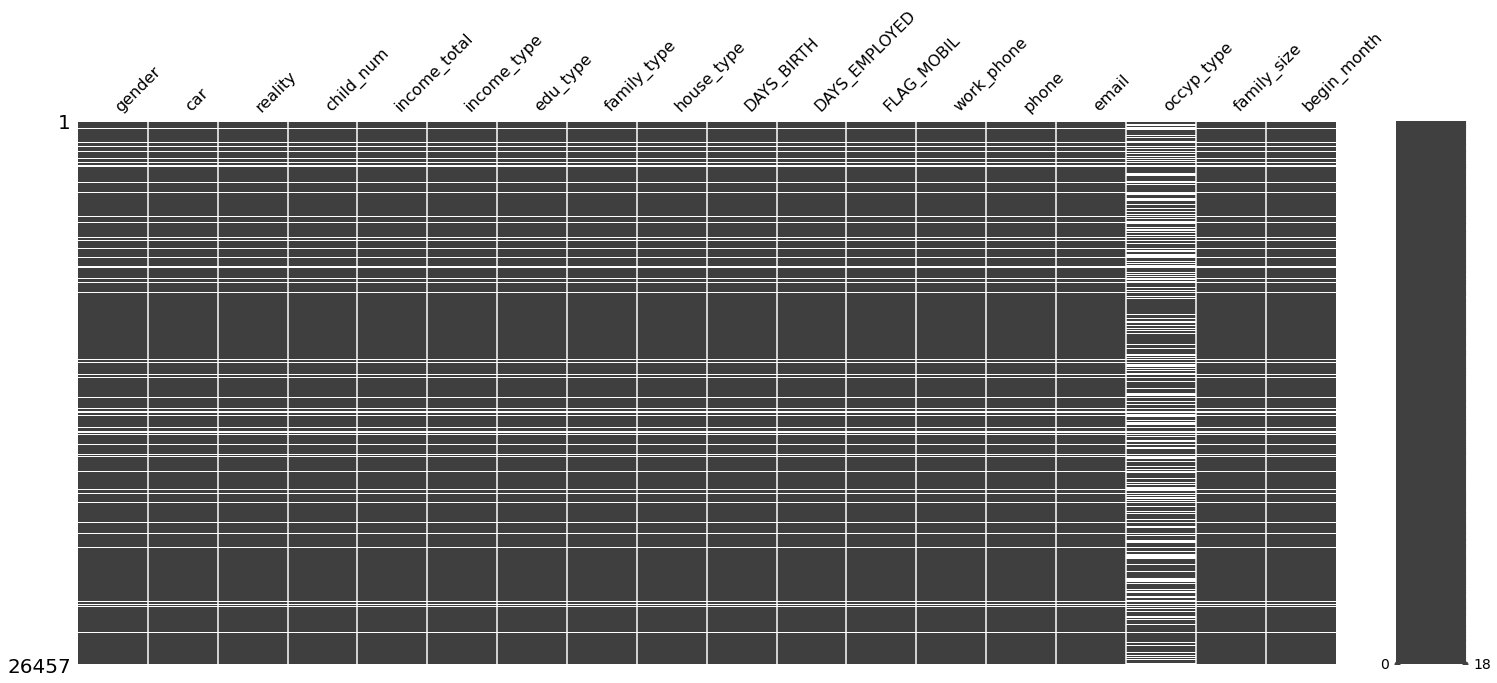

In [79]:
msno.matrix(missed_data)

### 1. Mean(평균)

확률 이론과 통계 관점에서 (모)평균 또는 기댓값은 중심에 대한 경향성을 알 수 있는 척도입니다.<br>
일반적으로 평균이라고 부르는 것으로 산술 평균이라고 하고, 이 평균은 표본 평균이라고도 합니다.<br>
평균은 모든 관측치의 값을 모두 반영하므로 `지나치게 작거나 큰 값(이상치)들의 영향을 많이` 받게 됩니다.<br>
평균은 모든 샘플의 값을 더하고, 샘플의 개수로 나누어 계산할 수 있습니다.<br>

$$ E(x) = {\sum x \over n}$$

평균, 중간값, 최빈값으로 결측치를 처리하는 SimpleImputer는 Scikit-Learn에서 impute 패키지에 있습니다.

In [95]:
from sklearn.impute import SimpleImputer

In [96]:
mean_df = missed_data.copy()

In [97]:
pd.isna(mean_df[num_columns]).sum()

child_num        2645
income_total     2645
DAYS_BIRTH       2645
DAYS_EMPLOYED    2645
FLAG_MOBIL       2645
work_phone       2645
phone            2645
email            2645
family_size      2645
begin_month      2645
dtype: int64

In [98]:
imputer = SimpleImputer(strategy='mean')
# mean_df[num_columns] = imputer.fit_transform(mean_df[num_columns])

imputer.fit(mean_df[num_columns])
mean_df[num_columns] = imputer.transform(mean_df[num_columns])

In [99]:
pd.isna(mean_df[num_columns]).sum()

child_num        0
income_total     0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
dtype: int64

In [100]:
imputer.statistics_

array([ 4.28103477e-01,  1.87493641e+05, -1.59573547e+04,  5.92958093e+04,
        1.00000000e+00,  2.23458760e-01,  2.93381488e-01,  9.18444482e-02,
        2.19464976e+00, -2.61029733e+01])

### 2. Median(중간값) 
중간값은 데이터 샘플을 개수에 대해서 절반으로 나누는 위치의 값을 말합니다. <br>
데이터 샘플의 수가 짝수개일 때에는 중간에 위치한 두 값의 평균을 사용합니다.<br>
중간값은 모든 관측치의 값을 모두 반영하지 않으므로 `지나치게 작거나 큰 값(이상치)들의 영향을 덜` 받습니다.<br>
중간값은 샘플을 값에 대해 정렬하고, 중앙에 위치한 값으로 구할 수 있습니다.

In [86]:
median_df = missed_data.copy()

In [87]:
imputer = SimpleImputer(strategy='median')
median_df[num_columns] = imputer.fit_transform(median_df[num_columns])

In [88]:
pd.isna(median_df[num_columns]).sum()

child_num        0
income_total     0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
dtype: int64

### 3. Iterative Impute (R 언어의 MICE 패키지)
Round robin 방식으로 반복하여 결측값을 회귀하는 방식으로 결측치를 처리합니다. <br>
결측값을 회귀하는 방식으로 처리하기 때문에 수치형 변수에만 적용할 수 있습니다.

1. 각 결측치를 해당 변수의 평균으로 채워넣는다. 
2. 대체할 변수의 결측치는 제외한 상태로 해당 변수의 결측치를 회귀모델을 이용하여 예측한다.
3. 다른 변수에서도 해당 방식을 반복한다.
4. 모든 변수에 대해 반복 후 해당 이터레이션에서 이전 반복에서 할당했던 값과의 차이를 계산한다.
5. 해당 값의 차이가 0이 될 때(수렴)까지 반복한다.

MICE 알고리즘으로 결측치를 처리하는 IterativeImputer는 Scikit-Learn에서 impute 패키지에 있습니다.

#### ref
- [Scikit-Learn, Iterative Imputer (MICE)](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice)
- [MICE 알고리즘 설명](https://ichi.pro/ko/deiteo-seteueseo-gyeol-cheuggabs-eul-daechihaneun-mice-algolijeum-217004654686142)

In [101]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [102]:
impute_df = missed_data.copy()

In [103]:
imp_mean = IterativeImputer(random_state=0)
impute_df[num_columns] = imp_mean.fit_transform(impute_df[num_columns])

In [104]:
pd.isna(impute_df[num_columns]).sum()

child_num        0
income_total     0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
dtype: int64

### 4. Mode(최빈값)
최빈값은 범주형 변수에서 가장 자주 등장하는 값을 말합니다.<br>

In [89]:
mode_df = missed_data.copy()

In [91]:
pd.isna(mode_df[cat_columns]).sum()

gender          2645
car             2645
reality         2645
income_type     2645
edu_type        2645
family_type     2645
house_type      2645
occyp_type     10005
dtype: int64

In [92]:
imputer = SimpleImputer(strategy='most_frequent')
mode_df[cat_columns] = imputer.fit_transform(mode_df[cat_columns])

In [93]:
pd.isna(mode_df[cat_columns]).sum()

gender         0
car            0
reality        0
income_type    0
edu_type       0
family_type    0
house_type     0
occyp_type     0
dtype: int64

In [94]:
imputer.statistics_

array(['F', 'N', 'Y', 'Working', 'Secondary / secondary special',
       'Married', 'House / apartment', 'Laborers'], dtype=object)

### 주의사항
- 결측치 처리는 가능하면 스케일링 작업 이전에 해주는 것이 좋습니다. 예를 들어 특정 컬럼의 결측치를 평균 값으로 대치하려고할 때 Standard Scaling을 진행하게되면 해당 컬럼의 결측치는 모두 0으로 대치될 수 있기 때문입니다. 

# Categorical Variable to Numeric Variable 
이번에는 범주형 변수를 수치형 변수로 나타내는 방법에 대해 알아보겠습니다. <br>
여기에서 범주형 변수란, 차의 등급을 나타내는 [소형, 중형, 대형] 처럼 표현되는 변수를 말합니다. <br>
범주형 변수는 주로 데이터 상에서 문자열로 표현되는 경우가 많으며, 문자와 숫자가 매핑되는 형태로 표현되기도 합니다.<br>

## 1. Label Encoding
라벨 인코딩은 n개의 범주형 데이터를 0~n-1 의 연속적인 수치 데이터로 표현합니다.<br>
예를 들어, 차의 등급 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : 0 <br>
중형 : 1 <br>
대형 : 2 <br>
라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이라는 의미가 아님을 주의하셔야 합니다. 

Label Encoding과 Scikit-Learn의 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-Learn Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=label%20encoder#sklearn.preprocessing.LabelEncoder)

#### 1) 모델 불러오기 및 정의하기

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [106]:
le.fit(data['family_type'])

LabelEncoder()

In [107]:
# classes_ 속성에 있는 순서(index)대로 라벨 번호가 부여됩니다.
le.classes_

array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [108]:
label_encoded = le.transform(data['family_type'])

#### 4) 결과 살펴보기

In [109]:
result = pd.DataFrame(data = np.concatenate([data['family_type'].values.reshape((-1,1)), label_encoded.reshape((-1, 1))], axis=1), 
                      columns=['label', 'label_encoded'])
result.head(20)

,label,label_encoded
0,Married,1
1,Civil marriage,0
2,Married,1
3,Married,1
4,Married,1
5,Married,1
6,Separated,2
7,Married,1
8,Married,1
9,Married,1


## 2. One-hot Encoding
원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현합니다. <br>
예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원핫 인코딩을 통해 변환하면 다음과 같이 표현할 수 있습니다.<br>
소형 : [1, 0, 0] <br>
중형 : [0, 1, 0] <br>
대형 : [0, 0, 1] <br>
원핫 인코딩으로 범주형 데이터를 나타내게되면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. <br> 
이는 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현할 수 있게 됩니다.

One-hot Encoding은 Scikit-Learn의 preprocessing 패키지에 있습니다.

#### ref
- [Scikit-Learn One-Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

#### 1) 모델 불러오기 및 정의하기

In [110]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

#### 2) 데이터에서 특징 찾기 (범주의 수)

In [111]:
ohe.fit(data[['family_type']])

OneHotEncoder(sparse=False)

In [112]:
ohe.categories_

[array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object)]

#### 3) 데이터 변환 (범주형 변수를 수치형 변수로)

In [113]:
one_hot_encoded = ohe.transform(data[['family_type']])

In [114]:
# sparse matrix
one_hot_encoded

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

#### 4) 결과 살펴보기

In [115]:
result = pd.concat([data['family_type'], pd.DataFrame(one_hot_encoded, columns=ohe.categories_[0])], axis=1)
result.head(10)

,family_type,Civil marriage,Married,Separated,Single / not married,Widow
0,Married,0.0,1.0,0.0,0.0,0.0
1,Civil marriage,1.0,0.0,0.0,0.0,0.0
2,Married,0.0,1.0,0.0,0.0,0.0
3,Married,0.0,1.0,0.0,0.0,0.0
4,Married,0.0,1.0,0.0,0.0,0.0
5,Married,0.0,1.0,0.0,0.0,0.0
6,Separated,0.0,0.0,1.0,0.0,0.0
7,Married,0.0,1.0,0.0,0.0,0.0
8,Married,0.0,1.0,0.0,0.0,0.0
9,Married,0.0,1.0,0.0,0.0,0.0
